In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [85]:
inputfile ="phix174.txt"
f = open(inputfile, "r")
seq = f.read()
   
seq = seq.replace("\n", "") 
seq = seq.replace("\r", "")
seq = seq.upper()
print(seq)

GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGAGTCGAAAAATTATCTTGATAAAGCAGGAATTACTACTGCTTGTTTACGAATTAAATCGAAGTGGACTGCTGGCGGAAAATGAGAAAATTCGACCTATCCTTGCGCAGCTCGAGAAGCTCTTACTTTGCGACCTTTCGCCATCAACTAACGATTCTGTCAAAAACTGACGCGTTGGATGAGGAGAAGTGGCTTAATATGCTTGGCACGTTCGTCAAGGACTGGTTTAGATATGAGTCACATTTTGTTCATGGTAGAGATTCTCTTGTTGACATTTTAAAAGAGCGTGGATTACTATCTGAGTCCGATGCTGTTCAACCACTAATAGGTAAGAAATCATGAGTCAAGTTACTGAACAATCCGTACGTTTCCAGACCGCTTTGGCCTCTATTAAGCTCATTCAGGCTTCTGCCGTTTTGGATTTAACCGAAGATGATTTCGATTTTCTGACGAGTAACAAAGTTTGGATTGCTACTGACCGCTCTCGTGCTCGTCGCTGCGTTGAGGCTTGCGTTTATGGTACGCTGGACTTTGTGGGATACCCTCGCTTTCCTGCTCCTGTTGAGTTTATTGCTGCCGTCATTGCTTATTATGTTCATCCCGTCAACATTCAAACGGCCTGTCTCATCATGGAAGGCGCTGAATTTACGGAAAACATTATTAATGGCGTCGAGCGTCCGGTTAAAGCCGCTGAATTGTTCGCGTTTACCTTGCGTGTACGCGCAGGAAACACTGACGTTCTTACTGACGCAGAAGAAAACGTGCGTCAAAAATTACGTGCGGAAGGAGTGATGTAATGTCTAAAGGTAAAAAACGTTCTGGCGCTCGCCCTGGTCGTCCGCAGCCGTTGCGAGGTACTAAAGGCAAGCGTAAAGGCGCTCGTCTTTGGTATGTAGGTGGTCAACAATTTTAATTGCAGGGGCTTCGGCCCCTTACTTGAGGATAAATT

In [86]:

#make an array of dinucleotides that are presented in the order of the sequence, check every dinucleotide

n = 2
all_dnts = [seq[i:i+n] for i in range(0, len(seq), n)]
dnt = [i for n, i in enumerate(all_dnts) if i not in all_dnts[:n]]
print(dnt)






['GA', 'GT', 'TT', 'TA', 'TC', 'GC', 'CC', 'AT', 'CG', 'CA', 'AG', 'AA', 'CT', 'TG', 'AC', 'GG']


In [98]:
all_counts = {} 
for x in dnt: 
    count = seq.count(x) 
    #print("count is " + str(count) + " for " + x) 
    all_counts[x] = count 
# print(all_counts)

all_distances = {}
for x in dnt:
    distances = [len(i) for i in seq.split(str(x))][:-1]
    all_distances[x] = distances

#correct fact that GA is first dinucleotide so it thinks there's a 0 distance initially
correction = all_distances.get('GA')
correction.pop(0)
all_distances['GA'] = correction

#print(all_distances)

length = len(seq)
# for key, val in all_distances.items():
#     sum = 0
#     for i in val:
#         sum += 

res = []
for k, v in all_distances.items():
    res  = res + v


from collections import Counter
result = Counter(res).items()

output = {}

for n, count in result:
    if n > 2 and n < 55:
        #print(n, count)
        prob = 100 * count * (1 / (length - n - 1)) 
        output[n] = prob

output


{16: 2.607561929595828,
 4: 5.891098308864524,
 14: 1.899087693167008,
 7: 5.280773521755299,
 3: 4.23634336677815,
 11: 2.698176404912542,
 8: 3.4591779802864053,
 19: 2.4785687663063736,
 9: 2.790178571428571,
 6: 4.034207101691764,
 18: 1.3228991988075274,
 32: 0.5791145152251074,
 20: 1.0251630941286114,
 10: 4.465116279069767,
 5: 3.7546468401486988,
 24: 1.0445812348442454,
 44: 0.3182924545965175,
 13: 3.220402084884587,
 25: 1.1753731343283582,
 22: 1.5476412455715085,
 30: 0.5975723622782446,
 49: 0.29985007496251875,
 40: 0.598690364826941,
 23: 0.9884371503170459,
 21: 1.193139448173005,
 39: 0.3554059109614665,
 31: 0.9338812103100486,
 42: 0.3181733108740408,
 17: 1.825633383010432,
 15: 1.9925512104283054,
 35: 0.37383177570093457,
 48: 0.18737118231216038,
 28: 1.1573641963785701,
 33: 0.48579970104633785,
 12: 1.8983807928531546,
 51: 0.14998125234345708,
 43: 0.4867090977162112,
 36: 0.5234623294073658,
 46: 0.2809514890428919,
 47: 0.3372049456725365,
 34: 0.878340497

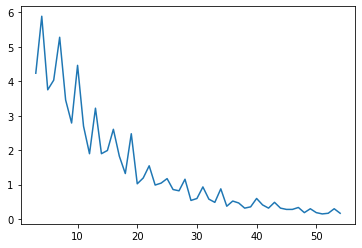

In [99]:
final = dict(sorted(output.items()))


x = list(final.keys())
y = list(final.values())
plt.title("phi-x174")
plt.plot(x,y) 